In [621]:
#importing all required liabraries


import numpy as np
import pandas as pd
import datetime as dt

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#pre-processing tools
from scipy import stats
from sklearn.utils import resample
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore


#Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


#ensemblib techniques
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.svm import SVC,SVR


#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold,cross_val_score



#feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest,f_classif

#Cross validation
from sklearn.model_selection import GridSearchCV

#warnings
import warnings
warnings.filterwarnings('ignore')

In [622]:
#import data
df1= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [623]:
#create copy of original data set
df = df1.copy()

In [624]:
#Columns along with it's values
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [625]:
#Dropping nominal value
df = df.drop(columns = ['Loan_ID'])

In [626]:
#describe dataset continuous features
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [627]:
#Shape after removing the nominal column
df.shape

(614, 12)

In [628]:
#checking dtypes of columns
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [629]:
#checking that categorical column containing unique values
for i in df.columns:
    if df[i].dtypes =='object':
        print(i,"==",df[i].nunique())

Gender == 2
Married == 2
Dependents == 4
Education == 2
Self_Employed == 2
Property_Area == 3
Loan_Status == 2


'Loan_Status' is our target variable ,This is classification Problem.

### Handaling Null Values

In [630]:
#check the null values in columns
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [631]:
#Replace the Null vales with respect to column modes,mean,median.we prefer mode bcz our data is categorical of that respective column
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

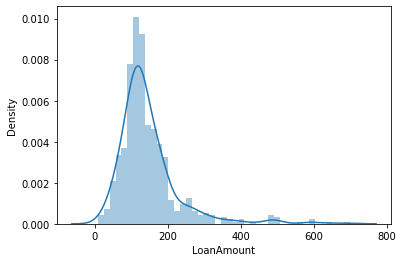

In [632]:
sns.distplot(df['LoanAmount'])

In [633]:
#Replacing the Loan Amount by its median .bcz outliers can effect on mean and if i consider the mean does not make sense also data is not normally distributed
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

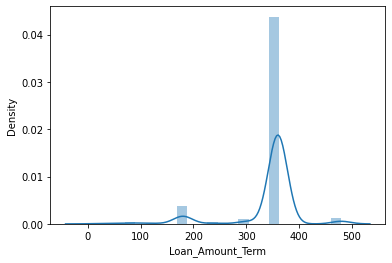

In [634]:
sns.distplot(df['Loan_Amount_Term'])

In [635]:
#there is no. diff. of mode and median in column, so we replace it with 360 BCZ it's a categorical variable
df['Loan_Amount_Term'].fillna(360.0,inplace=True)

#### After handaling null values

In [636]:
#no null values in dataset
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now there is no NULL Values in Datasets

### Data Encoding

In [637]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Encode Data BY using Data Encoding Techniques

In [638]:
#for convert the object to int
comman_encod=LabelEncoder()
ord_enc = OrdinalEncoder()

In [639]:
for i in df.columns:
    if df[i].dtypes=="object":
        if i =="Loan_Status":
            df[i]=comman_encod.fit_transform(df[i].values.reshape(-1,1))
        else:
            df[i]=ord_enc.fit_transform(df[i].values.reshape(-1,1)) 

Null Values has been removed & 
Data is Encoded

### Finding feature correlation

In [641]:
# #Seperate data set into train and test
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3,random_state=0)
# print(x_train.shape)
# print(x_test.shape)

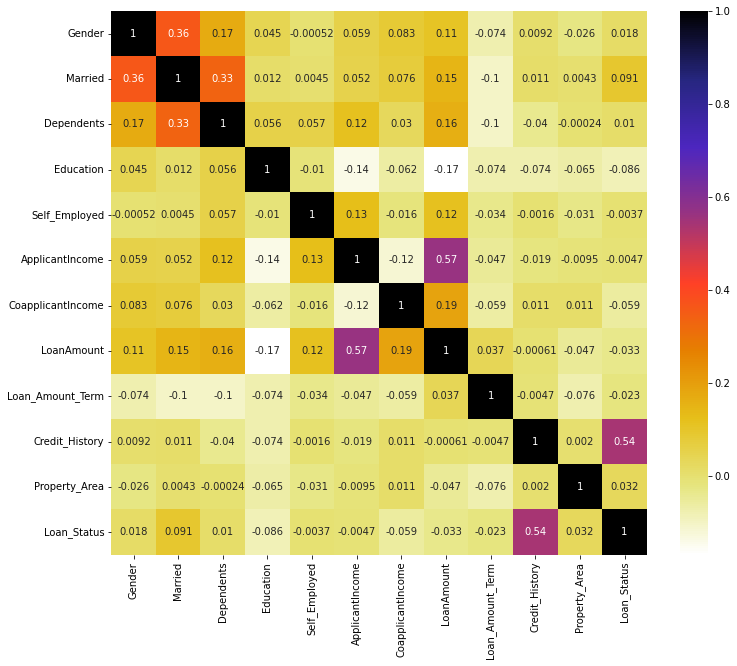

In [642]:
#Using  Person Correlation
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [643]:
cor["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

###### Observ :
    HIghly correlated is "Credit_History" and least correlated is "Education"

In [644]:
df1=df.copy()

### Data Cleaning

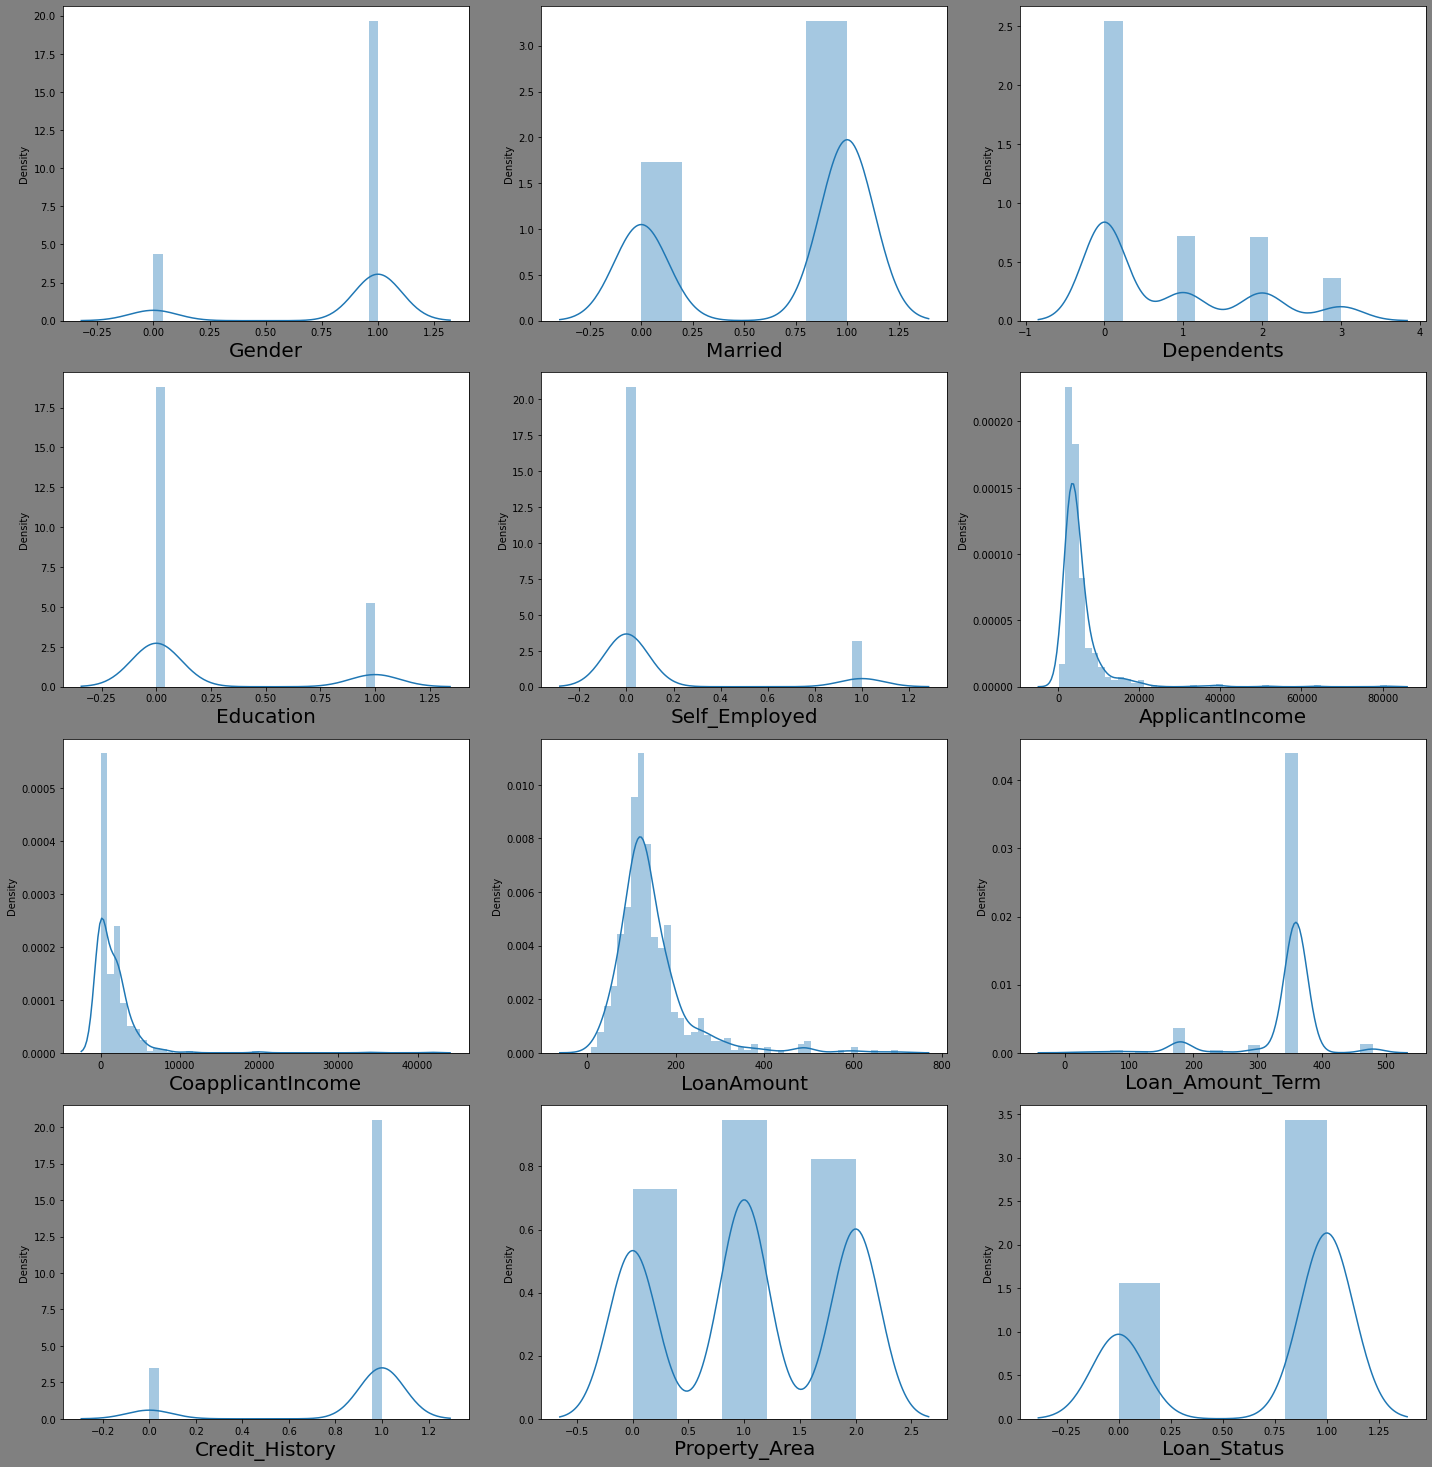

In [512]:
#let see how data is distribute in every column 

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [645]:
#check the skewness of data before 
df1.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [646]:
scalar = MinMaxScaler()
df["ApplicantIncome"] = scalar.fit_transform(df["ApplicantIncome"])

ValueError: Expected 2D array, got 1D array instead:
array=[ 5849.  4583.  3000.  2583.  6000.  5417.  2333.  3036.  4006. 12841.
  3200.  2500.  3073.  1853.  1299.  4950.  3596.  3510.  4887.  2600.
  7660.  5955.  2600.  3365.  3717.  9560.  2799.  4226.  1442.  3750.
  4166.  3167.  4692.  3500. 12500.  2275.  1828.  3667.  4166.  3748.
  3600.  1800.  2400.  3941.  4695.  3410.  5649.  5821.  2645.  4000.
  1928.  3086.  4230.  4616. 11500.  2708.  2132.  3366.  8080.  3357.
  2500.  3029.  2609.  4945.  4166.  5726.  3200. 10750.  7100.  4300.
  3208.  1875.  3500.  4755.  5266.  3750.  3750.  1000.  3167.  3333.
  3846.  2395.  1378.  6000.  3988.  2366.  3333.  2500.  8566.  5695.
  2958.  6250.  3273.  4133.  3620.  6782.  2484.  1977.  4188.  1759.
  4288.  4843. 13650.  4652.  3816.  3052. 11417.  7333.  3800.  2071.
  5316.  2929.  3572.  7451.  5050. 14583.  3167.  2214.  5568. 10408.
  5667.  4166.  2137.  2957.  4300.  3692. 23803.  3865. 10513.  6080.
 20166.  2014.  2718.  3459.  4895.  4000.  4583.  3316. 14999.  4200.
  5042.  5417.  6950.  2698. 11757.  2330. 14866.  1538. 10000.  4860.
  6277.  2577.  9166.  2281.  3254. 39999.  6000.  9538.  2980.  4583.
  1863.  7933.  3089.  4167.  9323.  3707.  4583.  2439.  2237.  8000.
  1820. 51763.  3522.  5708.  4344.  3497.  2045.  5516.  3750.  2333.
  6400.  1916.  4600. 33846.  3625. 39147.  2178.  2383.   674.  9328.
  4885. 12000.  6033.  3858.  4191.  3125.  8333.  1907.  3416. 11000.
  2600.  4923.  3992.  3500.  3917.  4408.  3244.  3975.  2479.  3418.
 10000.  3430.  7787.  5703.  3173.  3850.   150.  3727.  5000.  4283.
  2221.  4009.  2971.  7578.  6250.  3250.  4735.  6250.  4758.  6400.
  2491.  3716.  3189.  8333.  3155.  5500.  5746.  3463.  3812.  3315.
  5819.  2510.  2965.  6250.  3406.  6050.  9703.  6608.  2882.  1809.
  1668.  3427.  2583.  2661. 16250.  3083.  6045.  5250. 14683.  4931.
  6083.  2060.  3481.  7200.  5166.  4095.  4708.  4333.  3418.  2876.
  3237. 11146.  2833.  2620.  3900.  2750.  3993.  3103. 14583.  4100.
  4053.  3927.  2301.  1811. 20667.  3158.  2600.  3704.  4124.  9508.
  3075.  4400.  3153.  5417.  2383.  4416.  6875.  4666.  5000.  2014.
  1800.  2875.  5000.  1625.  4000.  2000.  3762.  2400. 20233.  7667.
  2917.  2927.  2507.  5746.  2473.  3399.  3717.  2058.  3541. 10000.
  2400.  4342.  3601.  3166. 15000.  8666.  4917.  5818.  4333.  2500.
  4384.  2935.  2833. 63337.  9833.  5503.  5250.  2500.  1830.  4160.
  2647.  2378.  4554.  3173.  2583.  2499.  3523.  3083.  6333.  2625.
  9083.  8750.  2666.  5500.  2423.  3813.  8333.  3875.  3000.  5167.
  4723.  5000.  4750.  3013.  6822.  6216.  2500.  5124.  6325. 19730.
 15759.  5185.  9323.  3062.  2764.  4817.  8750.  4310.  3069.  5391.
  3333.  5941.  6000.  7167.  4566.  3667.  2346.  3010.  2333.  5488.
  9167.  9504.  2583.  1993.  3100.  3276.  3180.  3033.  3902.  1500.
  2889.  2755.  2500.  1963.  7441.  4547.  2167.  2213.  8300. 81000.
  3867.  6256.  6096.  2253.  2149.  2995.  2600.  1600.  1025.  3246.
  5829.  2720.  1820.  7250. 14880.  2666.  4606.  5935.  2920.  2717.
  8624.  6500. 12876.  2425.  3750. 10047.  1926.  2213. 10416.  7142.
  3660.  7901.  4707. 37719.  7333.  3466.  4652.  3539.  3340.  2769.
  2309.  1958.  3948.  2483.  7085.  3859.  4301.  3708.  4354.  8334.
  2083.  7740.  3015.  5191.  4166.  6000.  2947. 16692.   210.  4333.
  3450.  2653.  4691.  2500.  5532. 16525.  6700.  2873. 16667.  2947.
  4350.  3095.  2083. 10833.  8333.  1958.  3547. 18333.  4583.  2435.
  2699.  5333.  3691. 17263.  3597.  3326.  2600.  4625.  2895.  6283.
   645.  3159.  4865.  4050.  3814.  3510. 20833.  3583.  2479. 13262.
  3598.  6065.  3283.  2130.  5815.  3466.  2031.  3074.  4683.  3400.
  2192.  2500.  5677.  7948.  4680. 17500.  3775.  5285.  2679.  6783.
  1025.  4281.  3588. 11250. 18165.  2550.  6133.  3617.  2917.  6417.
  4608.  2138.  3652.  2239.  3017.  2768.  3358.  2526.  5000.  2785.
  6633.  2492.  3333.  2454.  3593.  5468.  2667. 10139.  3887.  4180.
  3675. 19484.  5923.  5800.  8799.  4467.  3333.  3400.  2378.  3166.
  3417.  5116. 16666.  6125.  6406.  3159.  3087.  3229.  1782.  3182.
  6540.  1836.  3166.  1880.  2787.  4283.  2297.  2165.  4750.  2726.
  3000.  6000.  9357.  3859. 16120.  3833.  6383.  2987.  9963.  5780.
   416.  2894.  5703.  3676. 12000.  2400.  3400.  3987.  3232.  2900.
  4106.  8072.  7583.  4583.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [647]:
power = PowerTransformer()
power = PowerTransformer(method='box-cox', standardize=True)
df["ApplicantIncome"] = power.fit_transform(df[["ApplicantIncome"]])

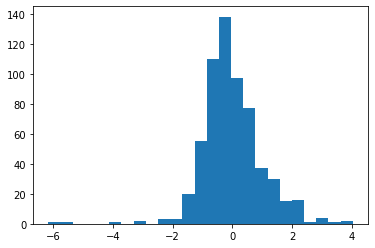

In [648]:
plt.hist(df["ApplicantIncome"] , bins=25)
plt.show()

In [649]:
df["ApplicantIncome"].skew()

-0.09251259759837804

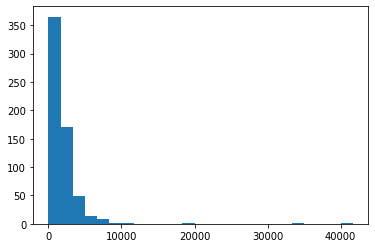

In [518]:
plt.hist(df1["CoapplicantIncome"] , bins=25)
plt.show()

In [659]:
scalar = MinMaxScaler(feature_range=(1, 2))
df["CoapplicantIncome"] = scalar.fit_transform(df[["CoapplicantIncome"]])

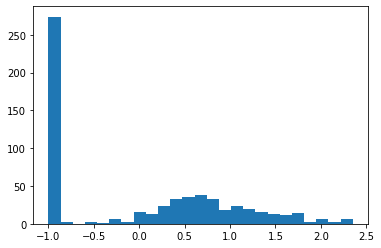

In [660]:
df["CoapplicantIncome"] = power.fit_transform(df[["CoapplicantIncome"]])
plt.hist(df["CoapplicantIncome"] , bins=25)
plt.show()

In [662]:
df["CoapplicantIncome"].skew()

0.3570372817446435

In [663]:
df.shape

(614, 12)

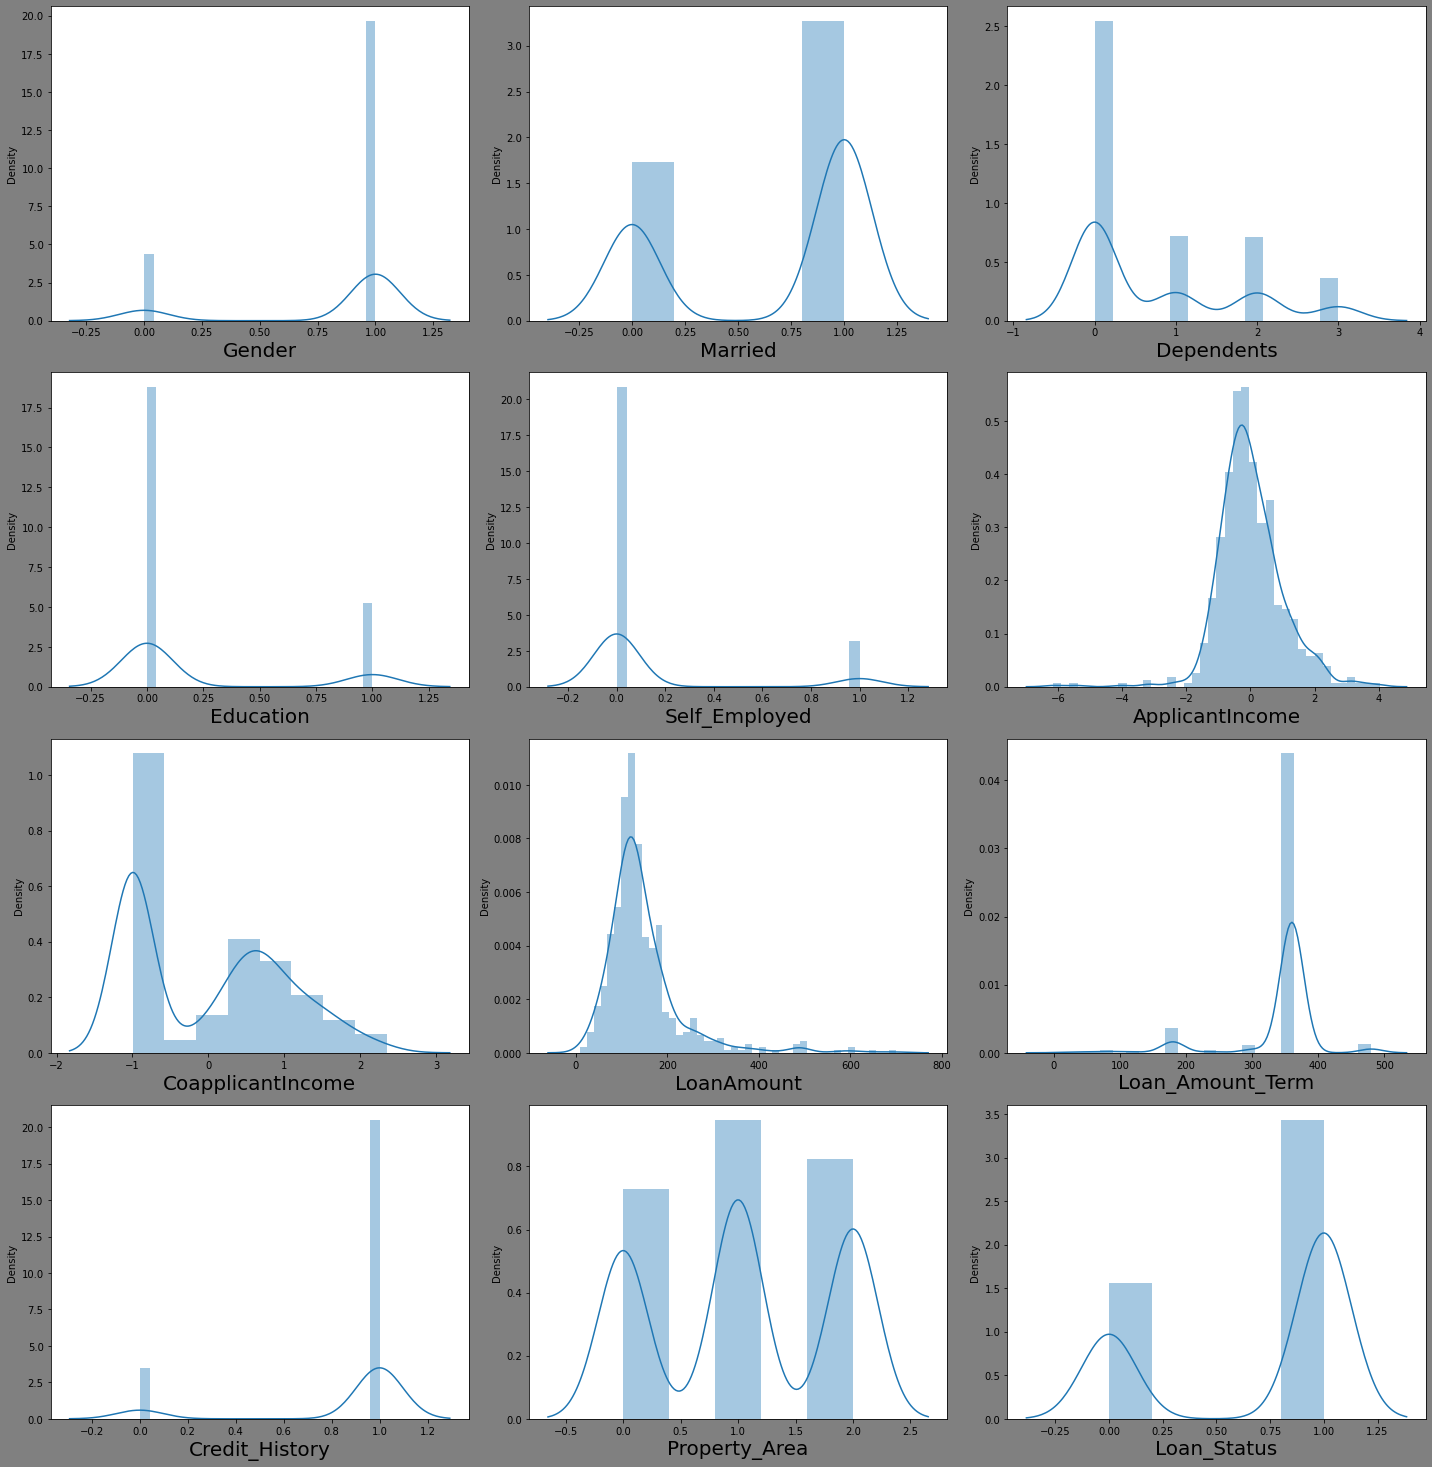

In [664]:
#let see how data is distribute in every column after transforming

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

##### Remove ouotlier by using IQR method

In [665]:
#We'll find the IQR to identify outlier

#1st quantile
q1 = df.quantile(0.25)

#3rd quantile
q3 = df.quantile(0.75)

#IQR
iqr = q3 - q1

In [666]:
#Removing Outlier Using IQR Method
df_new = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]

In [667]:
print("shape Before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new.shape)
print("Precentage of data loss".ljust(20),":",(100-((df_new.shape[0]/df.shape[0])*100)),"%")

shape Before and after
shape before         : (614, 12)
shape after          : (217, 12)
Precentage of data loss : 64.65798045602605 %


64.66% of data loss

#### Remove outlier by using Z_ Score 

In [668]:
#rEMOVING THE OUTLIER OF CONTINUOUS VARIABLE
from scipy.stats import zscore
z_score=np.abs(zscore(df[['ApplicantIncome','LoanAmount']]))
new_entry= (z_score<3).all(axis = 1)
new_df=df[new_entry]
new_df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,0.818951,0.649746,0.730964,0.225042,0.128596,-0.035893,-0.006106,135.725888,342.335025,0.854484,1.042301,0.686971
std,0.385385,0.477453,0.998493,0.417964,0.335035,0.814795,0.983580,58.086020,64.051590,0.352919,0.787554,0.464119
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.378300,-0.997527,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,-0.568615,-0.997527,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,-0.143151,0.124197,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.480473,0.767427,160.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,2.976763,2.350926,380.000000,480.000000,1.000000,2.000000,1.000000


In [669]:
print("shape Before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",new_df.shape)
print("Precentage of data loss".ljust(20),":",(100-((new_df.shape[0]/df.shape[0])*100)),"%")

shape Before and after
shape before         : (614, 12)
shape after          : (591, 12)
Precentage of data loss : 3.745928338762212 %


In [670]:
new_df.shape

(591, 12)

3 % of data loss

In [671]:
#continuoue with z Score
#O/P variable
y = new_df['Loan_Status']

#Droping categorical  features/independant variable 
x=new_df.drop(columns = ['Loan_Status'], axis = 1)

In [673]:
#continuoue with z Score
#O/P variable
yy = df['Loan_Status']

#Droping categorical  features/independant variable 
xx=df.drop(columns = ['Loan_Status'], axis = 1)

In [674]:
#checking data is balanced or not
print("Total 0's are =>",df.iloc[:,-1].value_counts()[0])
print("Total 1,s are =>",df.iloc[:,-1].value_counts()[1])

Total 0's are => 192
Total 1,s are => 422


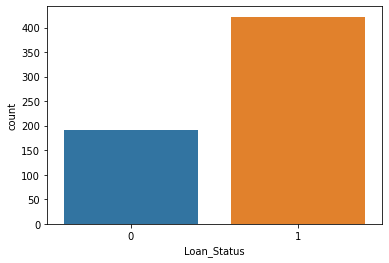

In [675]:
#will check each class frequency by using count plot
sns.countplot(x='Loan_Status',data=df)
plt.show()

#### Data is  imbalanced

### Apply  Different algorithms on data to find the best accuracy score

In [676]:
#converting float data type in to int data type
# df_ls=df[['Loan_Status']].astype(int)
print("Total 0's are =>",y.value_counts()[0])
print("Total 1,s are =>",y.value_counts()[1])

Total 0's are => 192
Total 1,s are => 422


In [679]:
print(new_df.shape)#after applying z_score Technique
print(df.shape)

(591, 12)
(614, 12)


In [694]:
x_train,x_test,y_train,y_test = train_test_split(xx,yy,test_size=0.19,random_state=0,stratify = y)
kn1=KNeighborsClassifier()
kn1.fit(x_train,y_train)
y_pred = kn1.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

64.1025641025641


In [700]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.19,random_state=0,stratify = y)
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

64.1025641025641


In [702]:
cv_score = cross_val_score(kn1,x,y,cv = 5)
cv_mean=cv_score.mean()
print(f"at cross foald {5} the cv score is {cv_mean*100} and accuracy for training is {Train_accurecy} and accurecy for testing is {Test_accurecy}")
print("\n")

at cross foald 5 the cv score is 64.33104177683765 and accuracy for training is 1.0 and accurecy for testing is 0.8428571428571429




In [704]:
x_train,x_test,y_train,y_test = train_test_split(xx,yy,test_size=0.19,random_state=432,stratify = y)
dt1=DecisionTreeClassifier()
dt1.fit(x_train,y_train)
y_pred = dt1.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

71.7948717948718


In [705]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.19,random_state=432,stratify = y)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

71.7948717948718


In [699]:
cv_score = cross_val_score(dt1,x,y,cv = 10)
cv_mean=cv_score.mean()
print(f"at cross foald {5} the cv score is {cv_mean} and accuracy for training is {Train_accurecy} and accurecy for testing is {Test_accurecy}")
print("\n")

at cross foald 5 the cv score is 0.7099141295862608 and accuracy for training is 1.0 and accurecy for testing is 0.8428571428571429




In [703]:
#Classification report
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.37      0.19      0.25        37
           1       0.69      0.85      0.76        80

    accuracy                           0.64       117
   macro avg       0.53      0.52      0.51       117
weighted avg       0.59      0.64      0.60       117



## UPsampling

#### By Using Sampling Technique

In [706]:
#continuoue with z Score
#O/P variable
y = new_df['Loan_Status']

#Droping categorical  features/independant variable 
x= new_df.drop(columns = ['Loan_Status'], axis = 1)

In [707]:
from sklearn.utils import resample

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)
#concat training data back together
x = pd.concat([x_train,y_train],axis = 1)

In [708]:
ls_n=x[x.Loan_Status==0]
ls_y=x[x.Loan_Status==1]

print(ls_n.shape)#0
print(ls_y.shape)#1

(139, 12)
(333, 12)


In [709]:
from sklearn.utils import resample


# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)
# #concat training data back together
# x = pd.concat([x_train,y_train],axis = 1)

# ls_n=x[x.Loan_Status==0]
# ls_y=x[x.Loan_Status==1]

# ls_n.shape#0
# ls_y.shape#1


#upsampling minority
ls_upsamle = resample(ls_n,replace = True,n_samples = len(ls_y),random_state = 20)

# #downsampling majority
# ls_downsamle = resample(ls_y,replace = True,n_samples = len(ls_n),random_state = 20)


#concat majority and upsamplrd minority
upsampled = pd.concat([ls_y,ls_upsamle])

#concat minority and downsamplrd majority
# downsampled = pd.concat([ls_n,ls_downsamle])

#check new class count
# downsampled.Loan_Status.value_counts()


print("Total 0's are =>",upsampled.iloc[:,-1].value_counts()[0])
print("Total 1,s are =>",upsampled.iloc[:,-1].value_counts()[1])

Total 0's are => 333
Total 1,s are => 333


In [710]:
#continuoue with z Score
#O/P variable
y = upsampled['Loan_Status']

#Droping categorical  features/independant variable 
x=upsampled.drop(columns = ['Loan_Status'], axis = 1)

In [711]:
print(y.shape)
print(x.shape)

(666,)
(666, 11)


In [741]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.21,random_state=932)
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

89.28571428571429


In [742]:
Train_accurecy = accuracy_score(y_train,dt.predict(x_train))
Test_accurecy = accuracy_score(y_test,y_pred)
print(Train_accurecy)
print(Test_accurecy)

1.0
0.8928571428571429


In [743]:
cv_score = cross_val_score(dt,x,y,cv = 5)
cv_mean=cv_score.mean()
print(f"at cross foald {5} the cv score is {cv_mean} and accuracy for training is {Train_accurecy} and accurecy for testing is {Test_accurecy}")
print("\n")

at cross foald 5 the cv score is 0.85 and accuracy for training is 1.0 and accurecy for testing is 0.8928571428571429




In [744]:
#Classification report
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        75
           1       0.89      0.88      0.88        65

    accuracy                           0.89       140
   macro avg       0.89      0.89      0.89       140
weighted avg       0.89      0.89      0.89       140



In [745]:
#Confusion mtrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[68,  7],
       [ 8, 57]], dtype=int64)

In [746]:
t_p=conf_mat[0][0]
f_p=conf_mat[0][1]
f_n=conf_mat[1][0]
t_n=conf_mat[1][1]

In [747]:
Precision = t_p/(t_p+f_p)
Precision

0.9066666666666666

In [748]:
Recall = t_p/(t_p+f_n)
Recall

0.8947368421052632

In [749]:
#our data is not completely balanced we should consider f1 score more than accurecy
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9006622516556291

In [750]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8917948717948718

In [751]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

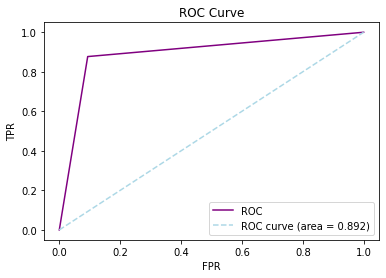

In [752]:
plt.plot(fpr,tpr,color='purple',label='ROC')
plt.plot([0,1],[0,1],color='lightblue',linestyle='--',label='ROC curve (area = %0.3f)'%auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

### ENSEMBLE TECHNIQUE

In [781]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.19,random_state=19)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

87.4015748031496


#### Let Us GridSearchCV for the best parameter to improve accuracy

In [782]:
#we'll find the parameter for predection of KNeighborsRegressor algorithm using GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =19,test_size = 0.19)
rf = RandomForestClassifier()
parameters = {'bootstrap':("True","False"),'criterion':('gini','entropy'),'oob_score':("True","False")
             ,'n_estimators':range(2,10)}
gridsearch = GridSearchCV(estimator = rf,n_jobs = -1,param_grid = parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'bootstrap': 'False',
 'criterion': 'gini',
 'n_estimators': 9,
 'oob_score': 'True'}

In [819]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.19, random_state =39)
rf = RandomForestClassifier(bootstrap= False, criterion= 'gini', n_estimators= 9)
rf.fit(x_train,y_train)
predect = rf.predict(x_test)
ac_score = accuracy_score(y_test,predect)
print(ac_score*100)

88.9763779527559


In [820]:
cv_score = cross_val_score(rf,x,y,cv = 5)
cv_mean=cv_score.mean()
#print(f"at cross foald {5} the cv score is {cv_mean} and accuracy for training is {Train_accurecy} and accurecy for testing is {Test_accurecy}")
print(cv_mean)

0.8904568068747173


In [821]:
#Now we'll find the accurecy of model ....
print(classification_report(y_test,predect,digits = 2))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        68
           1       0.86      0.92      0.89        59

    accuracy                           0.89       127
   macro avg       0.89      0.89      0.89       127
weighted avg       0.89      0.89      0.89       127



In [822]:
t_p = cfm[0][0]
f_p = cfm[0][1]
f_n = cfm[1][0]
t_n = cfm[1][1]

In [823]:
cfm = confusion_matrix(y_test,predect)
cfm

array([[59,  9],
       [ 5, 54]], dtype=int64)

In [824]:
Precision = t_p/(t_p+f_p)
Precision

0.8676470588235294

In [825]:
Recall = t_p/(t_p+f_n)
Recall

0.8805970149253731

In [826]:
F1_Score = 2*(Recall*Precision)/(Recall+Precision)
F1_Score

0.874074074074074

In [827]:
#AUC
auc = roc_auc_score(y_test,predect)
auc

0.8914506480558325

In [828]:
fpr,tpr,threshold = roc_curve(y_test,predect)

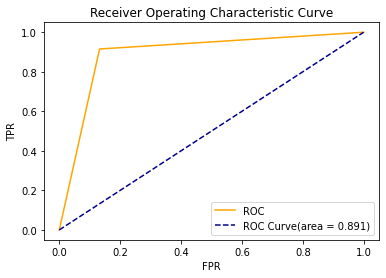

In [829]:
plt.plot(fpr,tpr,color="orange",label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC Curve(area = %0.3f)'%auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

##### Almost 89.1% area is covered by Curve.also in  cv and actual score there is not much more difference than DT model.so we are Continue  with this same model Random Forest 

After making data balanced by using upsampling we are getting good results , so we are Continue with same

In [830]:
#Saving the model
import pickle
filename = 'income.pkl'
pickle.dump(rf,open(filename,'wb'))

### Conclusion :

In [832]:
loaded_model = pickle.load(open('income.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

88.9763779527559


In [835]:
y_pred[:]

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [836]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=["predicted","original"])

In [837]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
predicted,0,0,0,0,1,0,0,0,1,0,...,0,0,1,1,1,1,1,1,1,0
original,0,0,0,1,1,0,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0
